In [72]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from math import ceil 

def extract_lead_II(file_path):
    '''Extract lead II signal potential from ECG results'''
    ECG = np.loadtxt(file_path, comments=['$', '*'], skiprows=4)[:, 0:11]
    VRA = ECG[:, 7]
    VLL = ECG[:, 10]
    Lead_II = VLL - VRA

    return Lead_II


In [74]:
# Initialization for output dataset
columns = ['LeadII', 'sigmaX', 'ratio2']
df_raw = pd.DataFrame(columns=columns)



In [78]:
my_raw_data_directory = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\biventricle_scenario_2_validation\simulation-EP\main-ep"

In [79]:
# ep results folder
ep_raw_folder = os.path.join(
    my_raw_data_directory,
    "d3plot",
)
# ecg results folder
ecg_result_raw_name = os.path.join(
    my_raw_data_directory,
    "em_EKG_001.dat",
)
# ecg result image
lead_II_raw_save_name = os.path.join(
    my_raw_data_directory,
    "Lead_II.png",
)

In [80]:
lead_II_new = extract_lead_II(ecg_result_raw_name)
lead_II_new

FileNotFoundError: D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\biventricle_scenario_2_validation\simulation-EP\main-ep\em_EKG_001.dat not found.

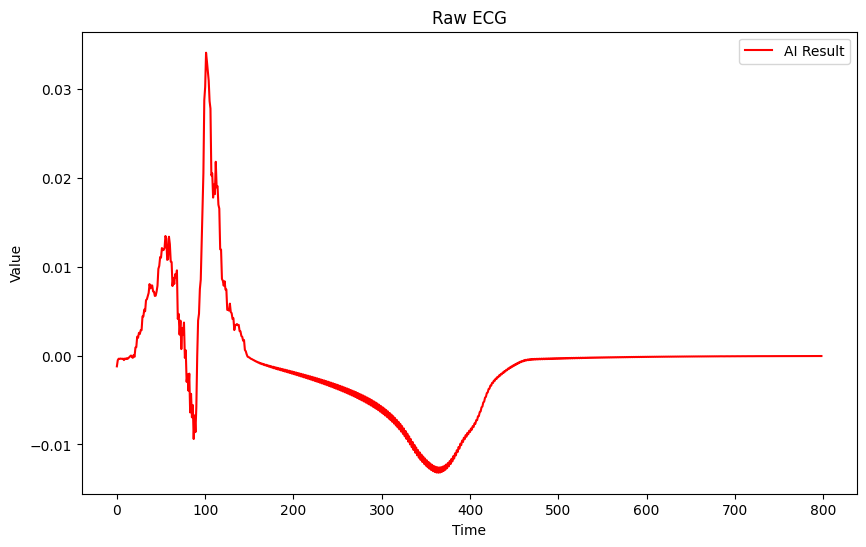

In [ ]:
import matplotlib.pyplot as plt

# length = min(len(leadII_data), len(ROM_result))
# leadII_data = leadII_data[:length]
# ROM_result = ROM_result[:length]

plt.figure(figsize=(10, 6))

# plt.plot(leadII_data, label='Raw ECG', color='blue')
plt.plot(lead_II_new, label='AI Result', color='red')

plt.legend()

plt.title('Raw ECG')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

In [ ]:
# SigmaX = 1.52
# Ratio2 = 5.39
# # Create dataset for training model
# # data = {'lead_II': lead_II, 'sigmaX': sigmaX, 'ratio2': ratio2}
# df_raw = df_raw.append({'LeadII': lead_II_new, 'sigmaX': SigmaX, 'ratio2': Ratio2}, ignore_index=True)

# dataset_save_name = os.path.join(
#     my_raw_data_directory,
#     'raw.csv',
# )
# df_raw.to_csv(dataset_save_name, index=False)

# previous

In [ ]:
df_ECG_previous = pd.read_csv(r'D:\xuhu\Temp\dataset_150_manual_clean.csv')
print(df_ECG_previous.head())

                                              LeadII  sigmaX  ratio2
0  [-4.15359140e-03 -1.76868466e-03 -1.11629389e-...    1.18    5.52
1  [-2.92033796e-03 -1.33099418e-03 -8.55957010e-...    0.88    6.81
2  [-5.37450260e-03 -2.19800531e-03 -1.38483209e-...    1.47    7.80
3  [-3.42123950e-03 -1.52011909e-03 -9.71318020e-...    1.00    7.15
4  [-6.59536090e-03 -2.50043795e-03 -1.53928134e-...    1.76    3.02


In [ ]:
# given_sigmaX = 1.52
# given_ratio2 = 5.39

given_sigmaX = 1.18
given_ratio2 = 5.52

filtered_df = df_ECG_previous[(df_ECG_previous['sigmaX'] == given_sigmaX) & (df_ECG_previous['ratio2'] == given_ratio2)]

if not filtered_df.empty:
    leadII_string = filtered_df['LeadII'].iloc[0]
    leadII_data = [float(value) for value in leadII_string.strip("[]").split()]
else:
    leadII_data = None
leadII_data

[-0.0041535914,
 -0.00176868466,
 -0.00111629389,
 -0.0010681775,
 -0.0009370026,
 -0.00090354905,
 -0.00086953736,
 -0.00082072117,
 -0.00111342574,
 -0.00076159959,
 -0.00097177982,
 -0.00065572434,
 -0.0009008158,
 -0.000636659,
 -0.000538082857,
 2.292636e-05,
 0.000466961381,
 -4.615723e-05,
 -0.000577568445,
 0.000312490838,
 0.000110057287,
 0.0022551755,
 0.0024143934,
 0.0047445264,
 0.0038208519,
 0.0047230509,
 0.0041506839,
 0.0046225521,
 0.0050290201,
 0.0102469063,
 0.0100123274,
 0.0099335977,
 0.0094417215,
 0.0119190514,
 0.0132019042,
 0.0143348137,
 0.015932219,
 0.0181567055,
 0.0165060047,
 0.0162406142,
 0.0169724923,
 0.0153011812,
 0.014598907,
 0.0114964425,
 0.0124966468,
 0.0126465572,
 0.0144372129,
 0.0206090991,
 0.0215663755,
 0.0231547386,
 0.0233738943,
 0.026234939,
 0.025009134,
 0.025333457,
 0.0243865986,
 0.0252459798,
 0.0255560744,
 0.0188804834,
 0.017476072,
 0.0238826988,
 0.0225076161,
 0.0214376535,
 0.0180009797,
 0.0043349457,
 0.00326430

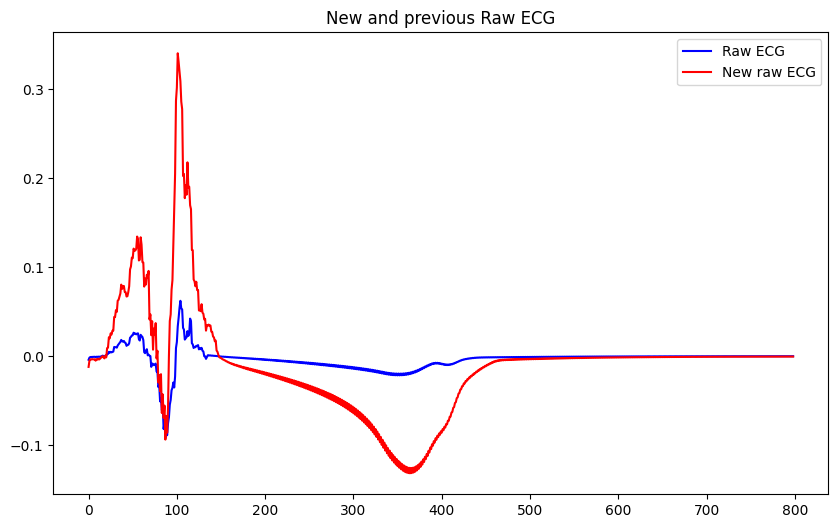

In [ ]:
import matplotlib.pyplot as plt

length = min(len(leadII_data), len(lead_II_new))
leadII_data = leadII_data[:length]
raw_ECG_new = lead_II_new[:length]
# ROM_result = ROM_result[:length]
# AI_result = AI_result[:length]

plt.figure(figsize=(10, 6))

plt.plot(leadII_data, label='previous ECG', color='blue')
plt.plot(raw_ECG_new, label='New raw ECG', color='red')
# plt.plot(ROM_result, label='ROM Result', color='red')
# plt.plot(AI_result, label='AI Result', color='green')

plt.legend()

plt.title('New and previous')

plt.show()